In [21]:
import numpy.random as rm
import matplotlib.pyplot as plt
import numpy as np

In [22]:
#1) Implement a Wright-Fisher Simulation
#create function for generating a population distribution given N population and p allele frequency 
def all_freq(size,freq):
    freq_list = []
    n = 2 * size
    p = freq / n
    while (p > 0) and (p < 1):
        freq_list.append(rm.binomial(n,p,size=None))
        p = freq_list[-1] / n
    return freq_list
#testing
#print(all_freq(100,90))

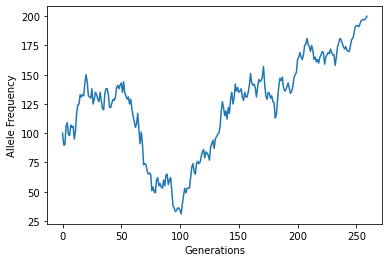

In [37]:
#2) Write a function that plots the allele frequency versus generation for the entirety of your simulation. 
#Produce such a plot for one of your simulations. Make sure you label your axes.
def plot_freq(freq_list):
    plt.plot(freq_list)
    plt.xlabel("Generations")
    plt.ylabel("Allele Frequency")
    plt.show()
#produce an example plot with 100 population and 90 allele frequency
fl1 = all_freq(100,90)
plot_freq(fl1)

(array([ 82., 125., 118.,  89.,  82.,  70.,  54.,  54.,  37.,  47.,  26.,
         28.,  18.,  16.,  15.,  19.,  22.,  16.,  14.,   7.,   7.,   9.,
          7.,   4.,   3.,   1.,   6.,   1.,   3.,   1.,   6.,   1.,   1.,
          2.,   3.,   3.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  14.  ,   42.52,   71.04,   99.56,  128.08,  156.6 ,  185.12,
         213.64,  242.16,  270.68,  299.2 ,  327.72,  356.24,  384.76,
         413.28,  441.8 ,  470.32,  498.84,  527.36,  555.88,  584.4 ,
         612.92,  641.44,  669.96,  698.48,  727.  ,  755.52,  784.04,
         812.56,  841.08,  869.6 ,  898.12,  926.64,  955.16,  983.68,
        1012.2 , 1040.72, 1069.24, 1097.76, 1126.28, 1154.8 , 1183.32,
        1211.84, 1240.36, 1268.88, 1297.4 , 1325.92, 1354.44, 1382.96,
        1411.48, 1440.  ]),
 <BarContainer object of 50 artists>)

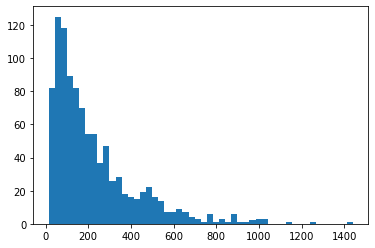

In [57]:
#3) For a starting allele frequency of 0.5, and a population size of 100, 
#produce a histogram with density showing time to fixation over (at least) 1000 trials.

fix_list = []
for i in range(1000):
    freq1 = all_freq(100,50)
    fix_list.append(len(freq1))
plt.hist(fix_list,density=False,bins=50)

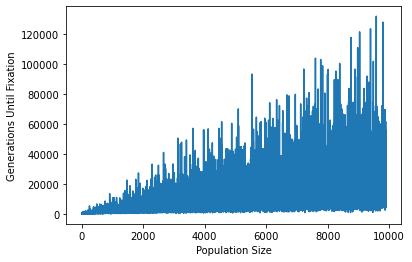

In [63]:
#4) For a starting allele frequency of 0.5, vary the population size and produce a plot 
#that shows fixation time vs (N). A reasonable range of population sizes might be 100 to 10 million.
fix_list = []
pop = 100
for i in range(100,10000):
    frequency = pop / 2
    freq1 = all_freq(pop,frequency)
    fix_list.append(len(freq1))
    pop = pop + 1
plt.plot(fix_list)
plt.xlabel("Population Size")
plt.ylabel("Generations Until Fixation")
plt.show()

Text(0.5, 0, 'Allele Frequency')

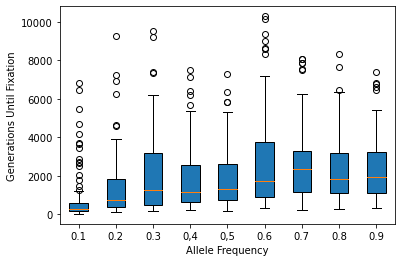

In [103]:
#5) Simulate the time to fixation under a range of different starting allele frequencies. 
#Produce a plot showing starting allele frequency vs. number of generations to fix. 
#Do (at least) 100 simulations for each and include the variability in your plot.
fix_list = []
fix_list_master = []
freq = 100
freq1 = []
for i in range(1,10,1):
    freq1 = []
    fix_list = []
    for val in range(100):
        freq1 = all_freq(1000,freq)
        fix_list.append(len(freq1))
    fix_list_master.append(fix_list)
    freq = freq + 100
labels = ['0.1','0.2','0.3','0,4','0,5','0.6','0.7','0.8','0.9']
#make boxplots
#plt.boxplot([fix_list_master[0],fix_list_master[1],fix_list_master[2],fix_list_master[3],fix_list_master[4],fix_list_master[5],fix_list_master[6],fix_list_master[7],fix_list_master[8]], vert=True, patch_artist=True, labels = labels)
plt.boxplot(fix_list_master, vert=True, patch_artist=True, labels = labels)
plt.ylabel("Generations Until Fixation")
plt.xlabel("Allele Frequency")

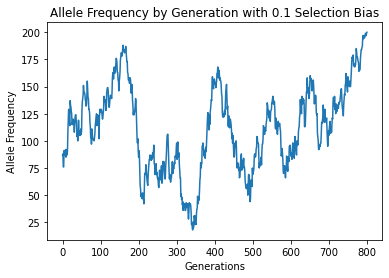

In [117]:
#6) Introduce selection to your function from Part 1 (as an additional parameter that can be specified) 
#and plot the allele frequency trajectory for some chosen parameters. 
#On your plot, make sure you note what your selection coefficient for the simulation was. 
#New function with selection
def sel_freq(size,freq,sel):
    freq_list = []
    n = 2 * size
    p = ((freq * (1+sel)) / (n - freq + (freq * (1 + sel))))
    while (p > 0) and (p < 1):
        freq_list.append(rm.binomial(n,p,size=None))
        p = freq_list[-1] / n
    return freq_list

#produce an example plot with 100 population and 90 allele frequency, with selection 0.1
fl1 = sel_freq(100,90,0.1)

plt.plot(fl1)
plt.xlabel("Generations")
plt.ylabel("Allele Frequency")
plt.title("Allele Frequency by Generation with 0.1 Selection Bias")
plt.show()


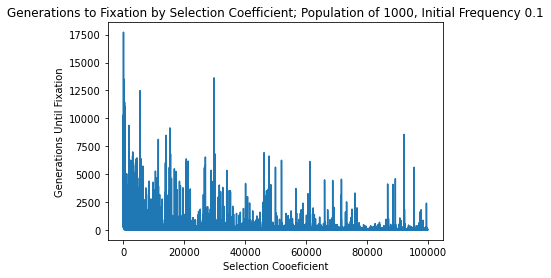

In [122]:
#Additionally, plot selection coefficient vs time to fixation for a fixed population size of your choice. 
#On your plot, make sure you note what your population size was.
fix_list = []
sel = 0
for i in range(100000):
    freq1 = sel_freq(1000,100,sel)
    fix_list.append(len(freq1))
    sel = sel + 1
plt.plot(fix_list)
plt.xlabel("Selection Cooeficient")
plt.ylabel("Generations Until Fixation")
plt.title("Generations to Fixation by Selection Coefficient; Population of 1000, Initial Frequency 0.1")
plt.show()